# <span style="color:red"> Numerical Simulation 8 </span>

## Exercise 8.1 - 8.2

#### <span style="color:black"> Objective </span>

The purpose of this exercise was to using a monte carlo metropolis variational algorithm to find the ground state of a single quantum particle in a one dimensional (1D) space confined by the following external potential:
$$
V(x) = x^4 - \frac{5}{2}x^2
$$

In particular starting from the following trial state 
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

it was asked to find the parameters $\sigma$ and $\mu$ which minimize the energy. After that we have to sample the squared norm of trial state with the best parameter and make a picture of this distribution. 

#### <span style="color:black"> Code's description </span>

The code's was built around two c++ classes: simulation and metropolis. Simulation takes care of the statistic with use of the blocking methods, it recives the vector and evaluates averages and errors. Metropolis samples the distribution, in our case the squared norm of the trial state, letting us to compute energy. Furthermore it calculate the acceptance so we're allowed to respect the $50\%$ rule. The structure of this class is almost the same of the one used for exercise 6 and there discussed. The only significant differences are:
- the lack of the method which compute step with gaussian distribution
- the using of a single double variable instead a vector of double. This modification is due to the fact that we had to sample an $1D$ distribution instead a $3D$ one

#### <span style="color:black"> Making of simulation </span>

The first part of the simulation consists in scanning the parameter and find out the one with lowest energy. At first I used a "scanning step" of $0.01$ for both $\sigma$ and $\mu$ starting from $\mu=0$ and $\sigma=0.01$. With this initially simulation I found $\sigma=0.62$ and $\mu=0.79$. Starting from around this values I sharpened the searching with a "scanning step" of $0.005$ and I found $\sigma=0.615$ and $\mu=0.8$. Every "scanning step" is a single simulation with the equilibration and $M=10^5$ metropolis step and $N=100$ blocks. 

The second part consists in a single simulation with the best parameter previously found and $M=10^8$ e $N=100$, the $\Delta$ of the metropolis step needed for acceptance were $\Delta=2.5$. With this simulation beside the energy I've made also an hystogram which rappresents the distribution.

#### <span style="color:black"> Result </span>

The energy converges, as it is showed below, to the value $-0.4444$ that is of course higher than the real ground state. The variational distribution is centered in the same region of the real distribution but the shape is, again off course, different.


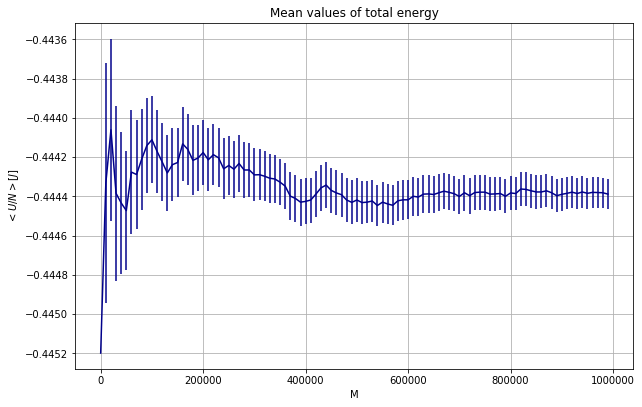

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math


x = np.arange(100)
x*=10000


Energy, errEnergy =np.loadtxt("OptVarState.dat", unpack=True)

fig=plt.figure(figsize=(10,14))

plt.subplot(211)
plt.errorbar(x, Energy, yerr=errEnergy, color="darkblue")
plt.xlabel('M')
plt.ylabel('$<U/N> [J]$')
plt.title("Mean values of total energy")
plt.grid(True)


plt.show()

Ground state energy:  -0.4605591814085699


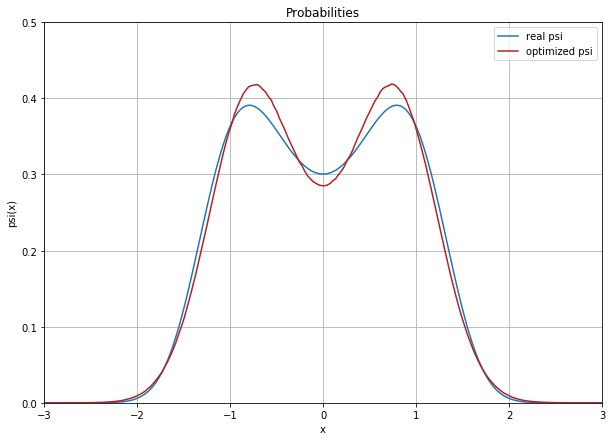

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

bin_size=6/200
x=np.linspace(-3,3,200)

trialstate=np.loadtxt("Pop.dat")



def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 6
N = 200 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])


# Plot a few things
plt.figure(figsize=(10,7))
plt.plot(x,(psi[0])**2, label="real psi")
plt.title("Probabilities")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((0,0.5))
plt.xlabel('x')
plt.ylabel('psi(x)')
plt.plot(x, trialstate, color="firebrick", label="optimized psi")
plt.grid(True)
plt.legend()
plt.show()


## Exercise 8.3

#### <span style="color:black"> Objective </span>

The aim of this exercise was to complete a PIGS algorithm and compute the same quantity of the previous exercise from two different trial function:
- a constant trial wave function, $\Psi_T(x)=1$
- using $\Psi_T(x) = \Psi_T^{\sigma,\mu}(x)$ with the variational parameters I have optimized.

After that is needed to compare the results of two algorithms. Finally, using the PIMC algorithm ($T>0$) to observe how the histogram with the sampled configurations changes by increasing the temperature. 

#### <span style="color:black"> Making of the simulation and results </span>

The PIGS total energy was compatible with both the metropolis one and the real GS energy as it easy to see in the third picture. It's worth to say that due to the fluctuations and errors of the kinetic part the compatibility is quite obvious. (1st picture) 
By contrast the real ground state distribution was obtained with a high accuracy starting from both the optimized trial state and constant trial state. It is interesting to observe in the second part of the picture that the difference between the projected psi and real psi are smaller starting from the optimazed state as someone should expect. It is trivial to observe that the VMC code is less accurate by comparison from the Exercise 8.2 picture and the 2nd picture of this one. (2nd picture)

Reducing imaginary time propagation with optimized state there's no big difference in the fluctuations of potential energy while the constant state takes more timeslices to decrease and increases earlier as it is visible in the firts part of 3rd picture. In the central zone of timeslices there's no significative difference between two states with the same imaginary time as it is visible in the second part of 3rd picture where it is showed a zoom of central part. It is trivial to see that at imaginary time equal to 1 the result between two state are significantly different and that the constant state becomes really inaccurate for most timeslices. This result could be caused by keeping the same timeslices even reducing imaginary time otherwise It become difficult to compare results with different time. (3rd picture)

In the 4th picture it is compared the probability with different imaginary time sttarting from constant state (part 1) and optimazed state (part 2). The result are perfectly compatible with the previous analisys for energy in fact while the optimazed state remains almost the same also at imaginary time equal to 1 the constant state at imaginary time 1 differs from the one at imaginary time 8 which is compatible with the real psi. (4th picture)

In the last picture is clearly visible how increasing the temperature changes the state in fact the state will be a superposition of ground state and some excited states. (5th picture) 

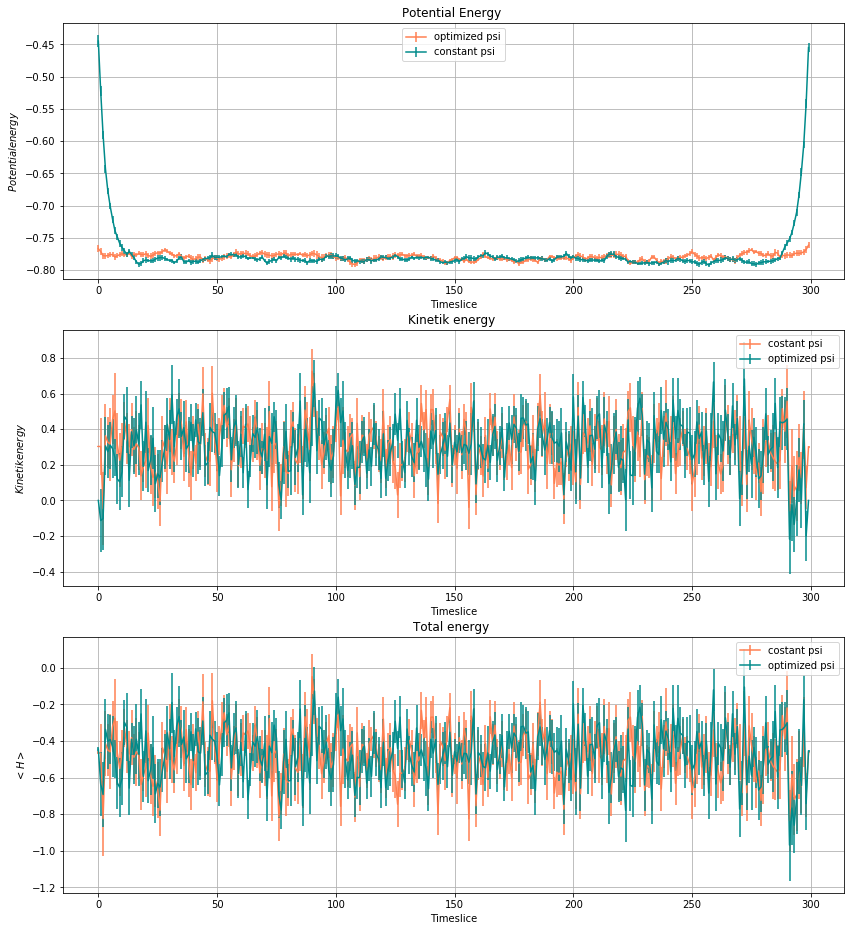

In [37]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

x = np.arange(300)
En, err =np.loadtxt("potential_psi.dat", usecols=(1,2), unpack=True)
En1, err1=np.loadtxt("potential_1.dat", usecols=(1,2), unpack=True)

kin, errk =np.loadtxt("kinetic_psi.dat", usecols=(1,2), unpack=True)
kin1, errk1=np.loadtxt("kinetic_1.dat", usecols=(1,2), unpack=True)



fig=plt.figure(figsize=(14,16))
plt.subplot(311)
plt.errorbar(x, En, yerr=err, color="coral", label="optimized psi")
plt.errorbar(x, En1, yerr=err1, color="darkcyan", label="constant psi")
plt.xlabel('Timeslice')
plt.ylabel('$Potential energy$')
plt.title("Potential Energy ")
plt.legend()
plt.grid(True)

plt.subplot(312)
plt.errorbar(x, kin, yerr=errk, color="coral", label="costant psi")
plt.errorbar(x, kin1, yerr=errk1, color="darkcyan", label="optimized psi")
plt.xlabel('Timeslice')
plt.ylabel('$Kinetik energy$')
plt.title("Kinetik energy ")
plt.legend()
plt.grid(True)

plt.subplot(313)
plt.errorbar(x, En+kin, yerr=pow(err*err+errk*errk,0.5), color="coral", label="costant psi")
plt.errorbar(x, En1+kin1, yerr=pow(err1*err1+errk1*errk1,0.5), color="darkcyan", label="optimized psi")
plt.xlabel('Timeslice')
plt.ylabel('$<H>$')
plt.title("Total energy ")
plt.legend()
plt.grid(True)

plt.show()

Ground state energy:  -0.46048037789894297


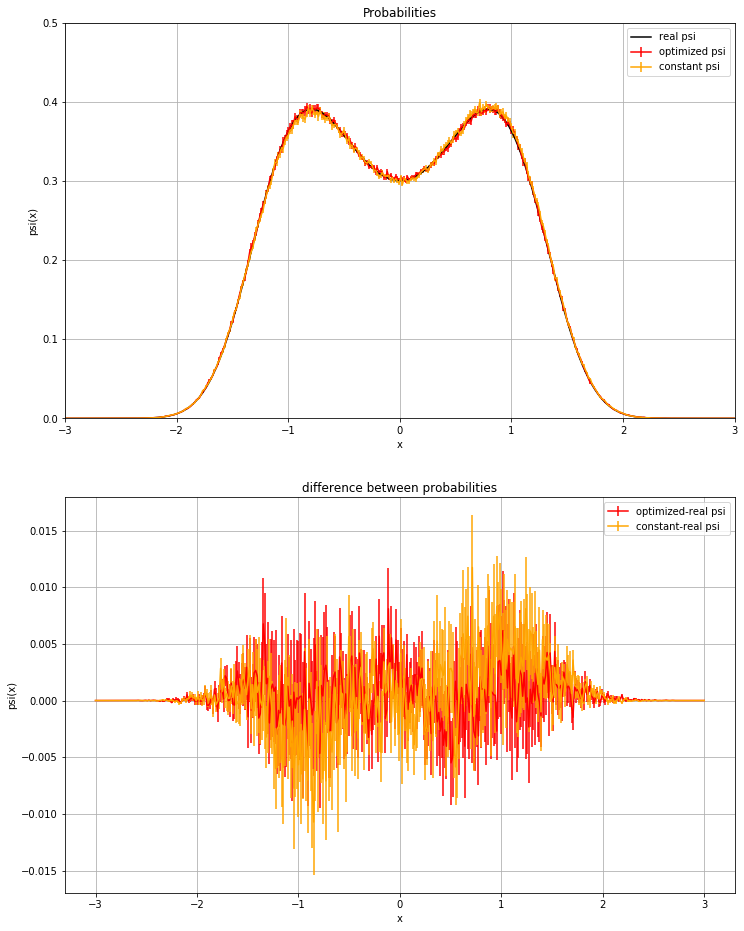

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

bin_size=6/400
x=np.linspace(-3,3,400)

trialstate, errts=np.loadtxt("probability_psi.dat", usecols=(1,2),unpack=True)
trialstate1, err1=np.loadtxt("probability8_1.dat", usecols=(1,2),unpack=True)


def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 6
N = 400 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi= np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])


plt.figure(figsize=(12,16))

plt.subplot(211)
plt.plot(x,(psi[0])**2,color="black" , label="real psi")
plt.title("Probabilities")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((0,0.5))
plt.xlabel('x')
plt.ylabel('psi(x)')
plt.errorbar(x, trialstate,yerr=errts, color="red", label="optimized psi")
plt.errorbar(x, trialstate1,yerr=err1, color="orange", label="constant psi")
plt.grid(True)
plt.legend()

plt.subplot(212)
plt.title("difference between probabilities")
plt.xlabel("x")
plt.grid(True)
#plt.xlim((-3,3))
#plt.ylim((0,0.5))
plt.xlabel('x')
plt.ylabel('psi(x)')
plt.errorbar(x, trialstate-(psi[0])**2,yerr=errts, color="red", label="optimized-real psi")
plt.errorbar(x, trialstate1-(psi[0])**2,yerr=err1, color="orange", label="constant-real psi")
plt.grid(True)
plt.legend()
plt.show()

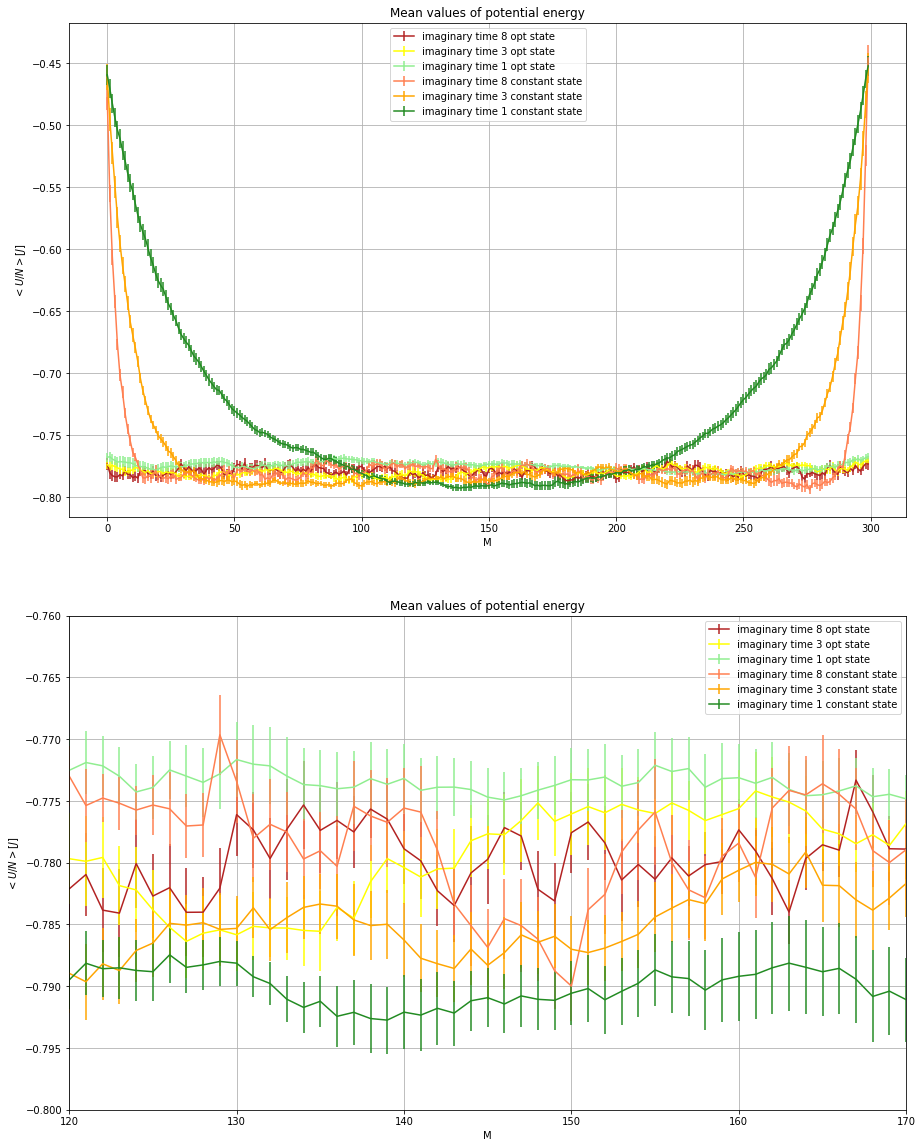

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math


x = np.arange(300)


Energy8, errEnergy8 =np.loadtxt("potential_8.dat",usecols=(1,2), unpack=True)
Energy5, errEnergy5 =np.loadtxt("potential_5.dat",usecols=(1,2), unpack=True)
Energy3, errEnergy3 =np.loadtxt("potential_3.dat",usecols=(1,2), unpack=True)
Energy1, errEnergy1 =np.loadtxt("potential_p1.dat",usecols=(1,2), unpack=True)

Energyc8, errEnergyc8 =np.loadtxt("potential_c8.dat",usecols=(1,2), unpack=True)
Energyc5, errEnergyc5 =np.loadtxt("potential_c5.dat",usecols=(1,2), unpack=True)
Energyc3, errEnergyc3 =np.loadtxt("potential_c3.dat",usecols=(1,2), unpack=True)
Energyc1, errEnergyc1 =np.loadtxt("potential_c1.dat",usecols=(1,2), unpack=True)

fig=plt.figure(figsize=(15,20))

plt.subplot(211)
plt.errorbar(x, Energy8, yerr=errEnergy8, color="firebrick", label='imaginary time 8 opt state')
plt.errorbar(x, Energy3, yerr=errEnergy3, color="yellow", label='imaginary time 3 opt state')
plt.errorbar(x, Energy1, yerr=errEnergy1, color="lightgreen", label='imaginary time 1 opt state')
plt.errorbar(x, Energyc8, yerr=errEnergyc8, color="coral", label='imaginary time 8 constant state')
plt.errorbar(x, Energyc3, yerr=errEnergyc3, color="orange", label='imaginary time 3 constant state')
plt.errorbar(x, Energyc1, yerr=errEnergyc1, color="forestgreen", label='imaginary time 1 constant state')
plt.xlabel('M')
plt.ylabel('$<U/N> [J]$')
plt.title("Mean values of potential energy")
plt.legend()
plt.grid(True)

plt.subplot(212)
plt.errorbar(x, Energy8, yerr=errEnergy8, color="firebrick", label='imaginary time 8 opt state')
plt.errorbar(x, Energy3, yerr=errEnergy3, color="yellow", label='imaginary time 3 opt state')
plt.errorbar(x, Energy1, yerr=errEnergy1, color="lightgreen", label='imaginary time 1 opt state')
plt.errorbar(x, Energyc8, yerr=errEnergyc8, color="coral", label='imaginary time 8 constant state')
plt.errorbar(x, Energyc3, yerr=errEnergyc3, color="orange", label='imaginary time 3 constant state')
plt.errorbar(x, Energyc1, yerr=errEnergyc1, color="forestgreen", label='imaginary time 1 constant state')
plt.xlabel('M')
plt.ylabel('$<U/N> [J]$')
plt.title("Mean values of potential energy")
plt.legend()
plt.xlim(120,170)
plt.ylim(-0.8,-0.76)
plt.grid(True)

plt.show()

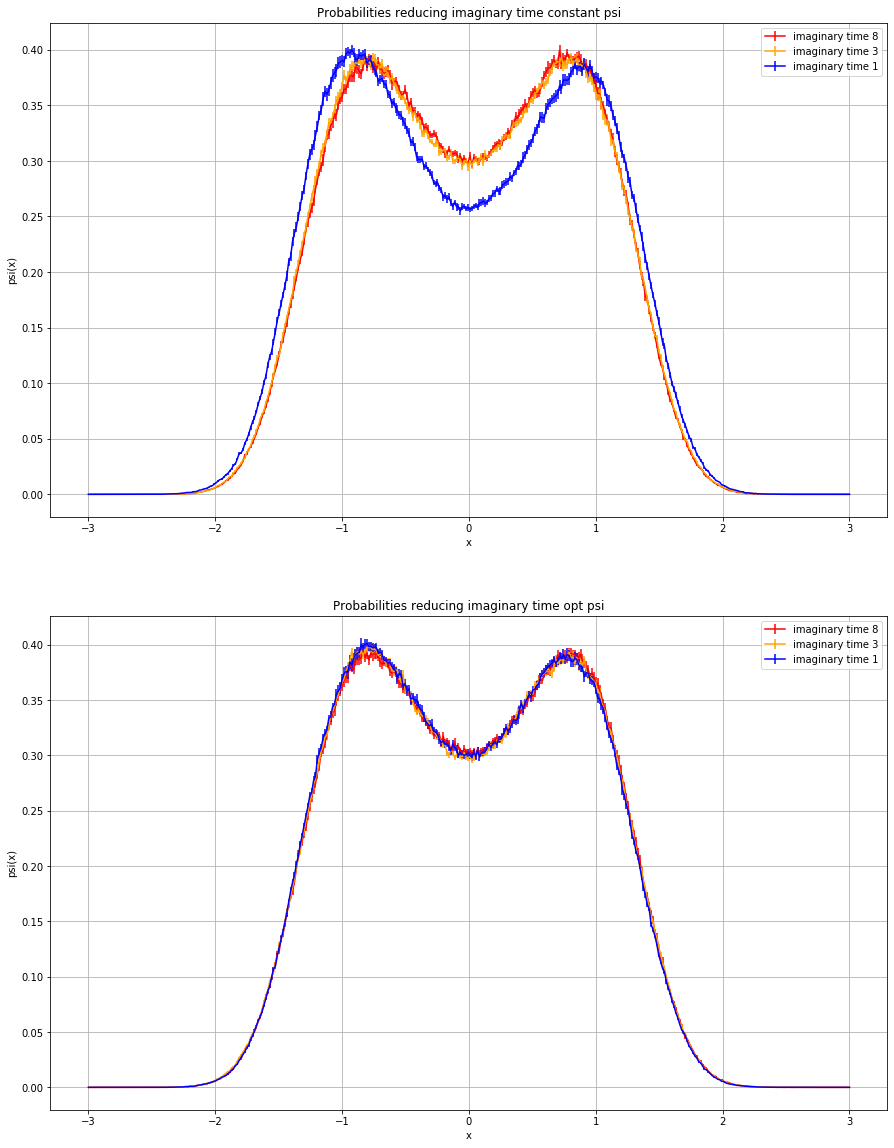

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

bin_size=6/400
x=np.linspace(-3,3,400)

Prob8, err8=np.loadtxt("probability8_1.dat",usecols=(1,2), unpack=True)
Prob3, err3=np.loadtxt("probability3_1.dat",usecols=(1,2), unpack=True)
Prob1, err1=np.loadtxt("probability1_1.dat",usecols=(1,2), unpack=True)

Prob8p, err8p =np.loadtxt("probability_psi.dat",usecols=(1,2), unpack=True)
Prob3p, err3p =np.loadtxt("probability3_psi.dat",usecols=(1,2), unpack=True)
Prob1p, err1p =np.loadtxt("probability1_psi.dat",usecols=(1,2), unpack=True)

fig=plt.figure(figsize=(15,20))

plt.subplot(211)
plt.errorbar(x, Prob8, yerr=err8 , color="red", label="imaginary time 8")
plt.errorbar(x, Prob3, yerr=err3 , color="orange", label="imaginary time 3")
plt.errorbar(x, Prob1, yerr=err1 , color="blue", label="imaginary time 1")
plt.xlabel('x')
plt.ylabel('psi(x)')
plt.title("Probabilities reducing imaginary time constant psi")
plt.legend()
plt.grid(True)

plt.subplot(212)
plt.errorbar(x, Prob8p, yerr=err8p ,color="red", label="imaginary time 8")
plt.errorbar(x, Prob3p, yerr=err3p ,color="orange", label="imaginary time 3")
plt.errorbar(x, Prob1p, yerr=err1p ,color="blue", label="imaginary time 1")
plt.xlabel('x')
plt.ylabel('psi(x)')
plt.title("Probabilities reducing imaginary time opt psi")
plt.legend()
plt.grid(True)

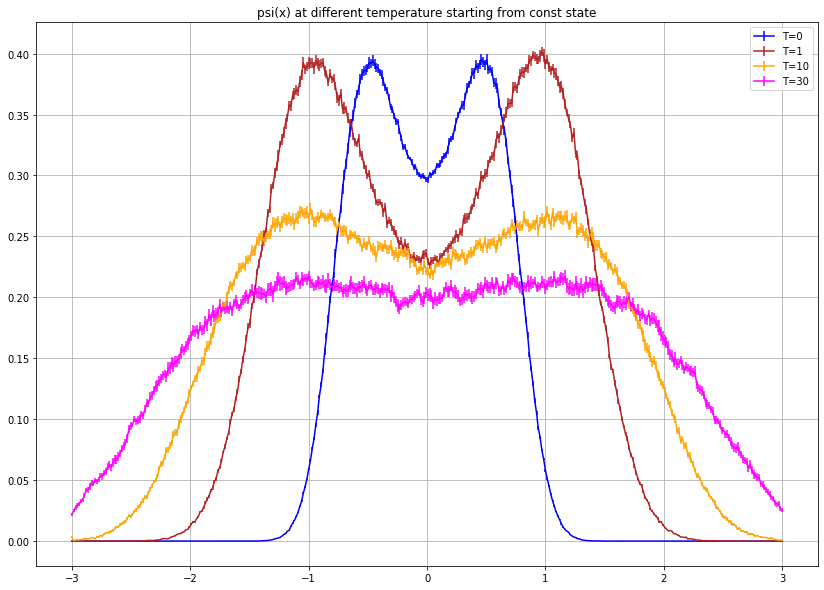

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

bin_size=6/400
x=np.linspace(-3,3,400)

trialstatepsi, errpsi =np.loadtxt("probability_1.dat",usecols=(1,2),unpack=True)
trialstate1, err1=np.loadtxt("probability1_t1.dat",usecols=(1,2),unpack=True)
trialstate10, err10=np.loadtxt("probability1_t10.dat",usecols=(1,2),unpack=True)
trialstate30, err30=np.loadtxt("probability1_t30.dat",usecols=(1,2),unpack=True)

plt.figure(figsize=(14,10))
plt.title("psi(x) at different temperature starting from const state")
plt.errorbar(x, trialstatepsi, yerr=errpsi,color="blue", label='T=0')
plt.errorbar(x, trialstate1, yerr=err1,color="firebrick", label='T=1')
plt.errorbar(x, trialstate10, yerr=err10,color="orange", label='T=10')
plt.errorbar(x, trialstate30, yerr=err30,color="magenta", label='T=30')
plt.grid(True)
plt.legend()
plt.show()